# Neural Networks

This notebook contains the exercises for the neural network slides. 

### Helper functions:

In [137]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.layers import Dense
import math

import matplotlib.pyplot as plt
print(tf.__version__)

def target_poly(x):
    output = np.empty(len(x))
    for i in range(len(x)):
        output[i] = (1/4.0) * (x[i]+4) * (x[i] + 1) * (x[i] - 2)
    return output

def target_poly_3(x):
    output = np.empty(len(x))
    for i in range(len(x)):
        output[i] = 2 * x[i]**3 + x[i]**2 - x[i] 
    return output

# polynomial with 8 roots
def target_poly_7(x):
    output = np.empty(len(x))
    for i in range(len(x)):
        output[i] = x[i]**7 + 4*x[i]**6 - 14*x[i]**5 - 56*x[i]**4 + 49*x[i]**3 + 196*x[i]**2 - 36*x[i] - 144
    return output

# a very high dimensional polygon
def target_poly_14(x):
    output = np.empty(len(x))
    for i in range(len(x)):
        output[i] = x[i]**14 - 0.97*x[i]**13 - 27.5669*x[i]**12 + 28.596911*x[i]**11 + 291.72658501*x[i]**10 - 322.8791018467*x[i]**9 - 1482.7415839005*x[i]**8 + 1741.757256169*x[i]**7 + 3643.0791581657*x[i]**6 - 4525.2996198175*x[i]**5 - 3566.980623085*x[i]**4 + 4745.7344671655*x[i]**3 + 263.42489522071*x[i]**2 - 614.82116925297+x[i] + 66.216725787218
    return output

def target_sine(x):
    output = np.empty(len(x))
    for i in range(len(x)):
        output[i] = math.sin(x[i])
    return output


def mother_wavelet(x):
    return (np.sin(2*np.pi*x) - np.sin(np.pi * x)) / np.pi * x


def plot_target(target_func):
    x = np.linspace(-3,3, 1000) 
    plt.plot(x,target_func(x), linestyle='--', color='C1', linewidth=2)
    
def combine_neurons(neurons, weights, bias, target_func):
    x = np.arange(-3, 3, 0.01)
    y = np.zeros((len(neurons[0])))
    plt.figure(figsize=(20,8))
    fig, ax = plt.subplots()
    for index in range(len(neurons)):
        y = y + neurons[index] * weights[index]
    y = y + bias
    y2 = target_func(x)
    plt.plot(x, y, label='ReLUs', linewidth=3)
    plt.plot(x, y2, label='Real Function', linestyle='--', color='C1', linewidth=2)
    
    mse = (np.sum((y - y2)**2)) / len(y)
    
    ax.grid(True, which='both')
    ax.axhline(y=0, color='k', linewidth=0.75)
    ax.axvline(x=0, color='k', linewidth=0.75)
    plt.title("MSE = %f" % mse)
    
from tensorflow.keras.activations import relu
def neuron(w, b, plot=True):
    x = np.arange(-3, 3, 0.01)
    y = keras.activations.relu(x * w + b)
    if plot:
        fig, ax = plt.subplots()
        plt.ylim((-10, 10)) 
        ax.grid(True, which='both')
        plt.plot(x, y)
    return y


def approximate_NN(target_func, min_value=-10, max_value=10, epochs=50, hidden_layers=1, neurons_per_layer=8):
    # Create a NN with a single hidden layer to learn the polynomial function
    #
    model = keras.Sequential()
    for x in range(hidden_layers):
        model.add(Dense(neurons_per_layer, input_dim=1, activation='relu', use_bias=True)) 
    model.add(Dense(1,  use_bias=True)) # 1 Neuron

    sgd = Adam(lr=0.01) # set lower learning rate
    model.compile(sgd, loss='mean_squared_error')

    # Create some data
    #
    X = np.random.uniform(min_value, max_value, (50000,1))
    Y = target_func(X)

    model.fit(X,Y, epochs=epochs, batch_size=512);

    # Plot neural network
    #
    x_test = np.arange(min_value-np.abs(min_value*0.25), max_value+np.abs(max_value*0.25), 0.01)
    y_test_nn = model.predict(x_test)
    y_real = target_func(x_test)
    
    mse = np.sum((np.ravel(y_real) - np.ravel(y_test_nn))**2)
    
    plt.figure(figsize=(8,5))
    plt.axline((min_value, 0), (min_value,10), color="r", linestyle='dashed', linewidth=0.75)
    plt.axline((max_value, 0), (max_value,10), color="r", linestyle='dashed', linewidth=0.75)
    
    plt.plot(x_test, y_test_nn, label='Approximation using NN')
    plt.plot(x_test, y_real, linestyle ='-.', label='Real Function')
    plt.legend()
    
    return model

2.3.0


### Exercise 1:

Remember how the universal approximation theorems tell us that neural networks can basically approximate any function. 
In this exercise we will use the ```approximate_NN()``` to test this theorem. You can supply custom mathematical function to approximate using lambdas such as the call:

```python
approximate_NN(lambda x: 3*(x**2) + 6, -10, 10, epochs=50, hidden_layers=1, neurons_per_layer=32)
```

will try to approximate the function $f(x):=3x^2 + 6$ within the interval $[-10;10]$ using 50 epochs for training a single layer of hidden neurons with 32 neurons each.

I have also supplied you with some more complex functions (```target_poly```, ```target_poly3```,  ```target_poly7```, ```target_poly14```, ```mother_wavelet```).

Try to answer these questions:
* What is the effect of changing the number of neurons vs. the number of hidden layers?
* What is the effect of having very simple vs. more and more complex functions with regards the the required neurons/layers?
* Does more training (more epochs) automatically mean better result?
* Can you find a function that we can not approximate?
* What happens outside the interval we used for training (indicated by the red dashed lines in the plots)?   



    

### Exercise 2:

In this exercise you are provided with a very simple neuron using a ReLU as activation function. You can supply the neurons parameters manually (the weight and bias term) as ```neuron(3, 2)``` will compute and plot all the output values generated by the neuron for all input values in an interval of $[-3;3]$. **Hint:** You can use the semi-colon in the call ```neuron(3, 2);``` to suppress the output. 


**Questions:**
* What is the effect of changing the weight?
* What is the effect of changing the bias?




### Exercise 3:

A mathematical function is linear iff $f(x)+f(y) = f(x+y)$ and $\lambda f(x) = f(\lambda x)$.

* Show that ReLU is not a linear function. 

### Exercise 4:

You saw that we can combine neurons to a neural network. Try to manually find the weights for approximating the ```target_poly_3``` function.  Use the ```combine_neurons``` function to combine multiple neurons. 

```python 
def combine_neurons(neurons, weights, bias, target_func):
    """ Parameters:
    neurons - a list of neurons such sa created by the neuron() function
    weights - a list of weights used by the output layer neuron
    bias - a single bias value used by the output layer neuron
    target_func - a function to plot as reference for approximation
    """
    
```

* Manually find the parameters of a neural network to approximate the ```target_poly_3``` function (*You can do this via trial and error, no calculations are necessary*).
* Try to find the parameters of a neural network to approximate the ```target_sine``` function (*this might be difficult*).
* Use the call to ```model = approximate_NN(...)``` to let tensorflow find the weights and biases for approximating the ```target_sine``` function. Have a look at ```model.layers[0].weights``` and ```model.layers[1].weights``` to help you find appropriate parameters for this problem. 

    

<Figure size 1440x576 with 0 Axes>

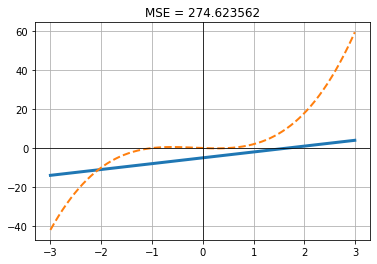

In [178]:
# Combine two neurons 
#
r1 = neuron(3,0, False)
r2 = neuron(-3,0, False)
# r1 is weighted by 1 and -1 with a bias of -5 in the output layer neuron
#
combine_neurons([r1, r2], [1, -1], -5, target_poly_3)

### Solution 4: